In [1]:
# imports
import pandas as pd
import numpy as np
import random

pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

cf.go_offline()
init_notebook_mode(connected = True)
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

# scikit-learn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

# stats model
import statsmodels.api as sm

# deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# dataset
loans = pd.read_csv('lending_club_loans.csv', header = 1)
loans = loans.dropna(thresh = len(loans) / 2, axis = 1)
loans.head()

D:\Applications\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning:

Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,Sep-2016,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2016,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,Sep-2016,719.0,715.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1076863,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other,personel,917xx,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,Apr-2016,604.0,600.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1075358,"Borrower added on 12/21/11 > I plan on combining three large interest bills together and freeing up some extra each month to pay toward other bills. I've always been a good payor but have found myself needing to make adjustments to my budget due to a medical scare. My job is very stable, I love it.<br>",other,Personal,972xx,OR,17.94,0.0,Jan-1996,695.0,699.0,0.0,15.0,0.0,27783.0,53.9%,38.0,f,270.78,270.78,3784.490000,3784.49,2729.22,1055.27,0.00,0.00,0.00,Sep-2016,

In [3]:
# dataset information
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 58 columns):
id                            42538 non-null object
member_id                     42535 non-null float64
loan_amnt                     42535 non-null float64
funded_amnt                   42535 non-null float64
funded_amnt_inv               42535 non-null float64
term                          42535 non-null object
int_rate                      42535 non-null object
installment                   42535 non-null float64
grade                         42535 non-null object
sub_grade                     42535 non-null object
emp_title                     39909 non-null object
emp_length                    41423 non-null object
home_ownership                42535 non-null object
annual_inc                    42531 non-null float64
verification_status           42535 non-null object
issue_d                       42535 non-null object
loan_status                   42535 non-null object
p

In [4]:
# dataset description
loans.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,4.253500e+04,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42535.000000,42535.000000,42506.000000,42506.000000,42506.000000,4.253500e+04,42506.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42390.0,42535.0,42506.000000,42390.0,42506.000000,41170.000000,42430.000000
mean,8.257026e+05,11089.722581,10821.585753,10139.830603,322.623063,6.913656e+04,13.373043,0.152449,713.052545,717.052545,1.081424,9.343951,0.058156,1.429786e+04,22.124406,11.849562,11.815891,12005.641023,11298.592611,9664.271346,2239.547094,1.515321,100.307353,13.956737,2612.720097,689.305302,676.382744,0.0,1.0,0.000094,0.0,0.143039,0.045227,0.000024
std,2.795409e+05,7410.938391,7146.914675,7131.686447,208.927216,6.409635e+04,6.726315,0.512406,36.188439,36.188439,1.527455,4.496274,0.245713,2.201844e+04,11.592811,125.376563,125.061859,9067.243728,9010.323570,7087.469380,2583.722104,7.827800,718.078716,159.621861,4385.198940,80.202882,119.011555,0.0,0.0,0.009700,0.0,29.359579,0.208737,0.004855
min,7.047300e+04,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,610.000000,614.000000,0.000000,1.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,6.384795e+05,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,685.000000,689.000000,0.000000,6.000000,0.000000,3.635000e+03,13.000000,0.000000,0.000000,5462.787435,4791.415000,4400.000000,657.100000,0.000000,0.000000,0.000000,211.370000,644.000000,640.000000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
50%,8.241780e+05,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,13.470000,0.000000,710.000000,714.000000,1.000000,9.000000,0.000000,8.821000e+03,20.000000,0.000000,0.000000,9680.084710,8955.040000,8000.000000,1339.160000,0.000000,0.000000,0.000000,527.930000,699.000000,695.000000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
75%,1.033946e+06,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,18.680000,0.000000,740.000000,744.000000,2.000000,12.000000,0.000000,1.725100e+04,29.000000,0.000000,0.000000,16421.755103,15525.180000,13425.000000,2802.950000,0.000000,0.000000,0.000000,3170.220000,744.000000,740.000000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
max,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,825.000000,829.000000,33.000000,47.000000,5.000000,1.207359e+06,90.000000,3555.850000,3553.300000,58563.679929,58563.680000,35000.020000,23823.750000,209.000000,29623.350000,7002.190000,36115.200000,850.000000,845.000000,0.0,1.0,1.000000,0.0,6053.000000,2.000000,1.000000


In [5]:
# dropping unnecessary columns
loans = loans.drop(['id', 'member_id', 'funded_amnt', 'funded_amnt_inv', 'pub_rec_bankruptcies', 'emp_title', 'issue_d', "zip_code", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt"], axis = 1)
loans.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,url,desc,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
0,5000.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,3.0,0.0,13648.0,83.7%,9.0,f,Sep-2016,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0
1,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,f,Sep-2016,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0
2,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,2.0,0.0,2956.0,98.5%,10.0,f,Sep-2016,719.0,715.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0
3,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1076863,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other,personel,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,10.0,0.0,5598.0,21%,37.0,f,Apr-2016,604.0,600.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0
4,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1075358,"Borrower added on 12/21/11 > I plan on combining three large interest bills together and freeing up some extra each month to pay toward other bills. I've always been a good payor but have found myself needing to make adjustments to my budget due to a medical scare. My job is very stable, I love it.<br>",other,Personal,OR,17.94,0.0,Jan-1996,695.0,699.0,0.0,15.0,0.0,27783.0,53.9%,38.0,f,Sep-2016,694.0,690.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0


In [6]:
# loan status value counts
loans['loan_status'].value_counts()

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

<Figure size 720x576 with 0 Axes>

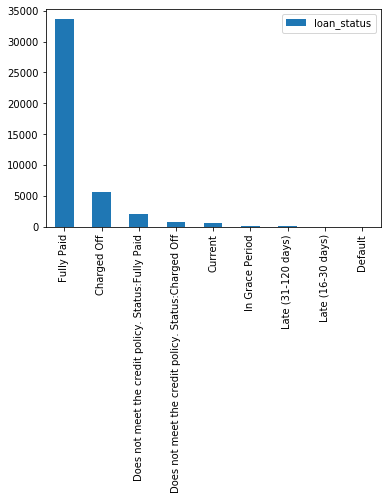

In [7]:
# loan status comparison
plt.figure(figsize = (10, 8))
pd.DataFrame(loans['loan_status'].value_counts()).plot(kind = 'bar')

In [8]:
# replacing fully paid and charged off with 1 and 0 respectively
status = {
    'loan_status': {
        'Fully Paid': 1,
        'Charged Off': 0
    }
}
loans = loans[(loans['loan_status'] == "Fully Paid") | (loans['loan_status'] == "Charged Off")]
loans = loans.replace(status)
loans.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,url,desc,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
0,5000.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,1,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,3.0,0.0,13648.0,83.7%,9.0,f,Sep-2016,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0
1,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,0,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,f,Sep-2016,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0
2,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,1,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,2.0,0.0,2956.0,98.5%,10.0,f,Sep-2016,719.0,715.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0
3,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,1,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1076863,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other,personel,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,10.0,0.0,5598.0,21%,37.0,f,Apr-2016,604.0,600.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0
5,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,1,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1075269,NaN,wedding,My wedding loan I promise to pay back,AZ,11.20,0.0,Nov-2004,730.0,734.0,3.0,9.0,0.0,7963.0,28.3%,12.0,f,Jan-2016,679.0,675.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0


In [9]:
# replacing status for visualization
status_r = {
    'loan_status': {
        1: 'Fully Paid',
        0: 'Charged Off'
    }
}

loans = loans.replace(status_r)
loans.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,url,desc,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
0,5000.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,3.0,0.0,13648.0,83.7%,9.0,f,Sep-2016,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0
1,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,f,Sep-2016,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0
2,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,2.0,0.0,2956.0,98.5%,10.0,f,Sep-2016,719.0,715.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0
3,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1076863,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other,personel,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,10.0,0.0,5598.0,21%,37.0,f,Apr-2016,604.0,600.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0
5,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1075269,NaN,wedding,My wedding loan I promise to pay back,AZ,11.20,0.0,Nov-2004,730.0,734.0,3.0,9.0,0.0,7963.0,28.3%,12.0,f,Jan-2016,679.0,675.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0


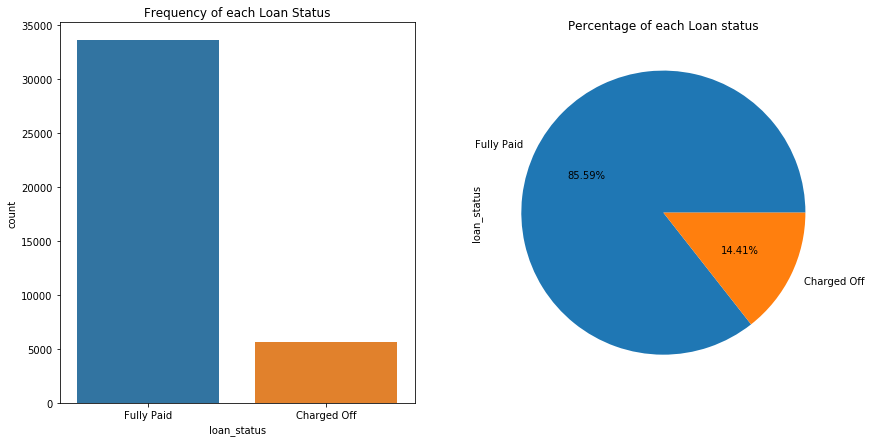

In [10]:
# visualization
fig, axs = plt.subplots(1, 2, figsize = (14, 7))
sns.countplot(x = 'loan_status',data = loans, ax = axs[0])
axs[0].set_title("Frequency of each Loan Status")

# pie chart
loans['loan_status'].value_counts().plot(x = None, y = None, kind = 'pie', ax = axs[1], autopct = '%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()

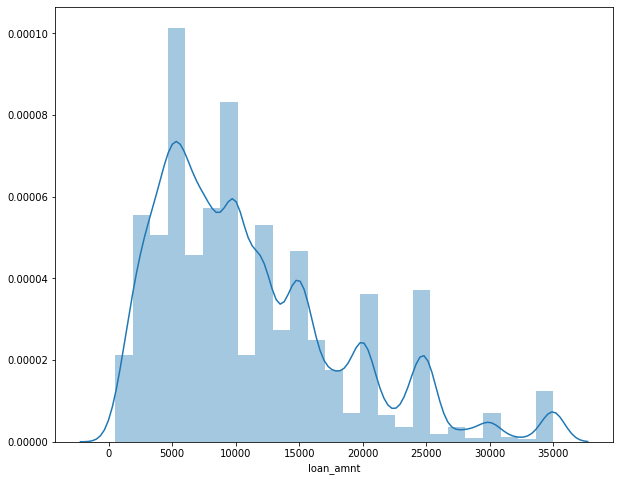

In [11]:
# loan amount distribution
plt.figure(figsize = (10, 8))
sns.distplot(loans['loan_amnt'], bins = 25)

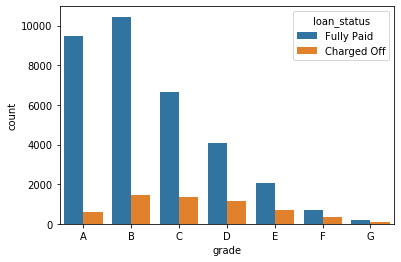

In [12]:
# grade countplot
sns.countplot(x = 'grade', data = loans, hue = 'loan_status', order = sorted(loans['grade'].unique()))

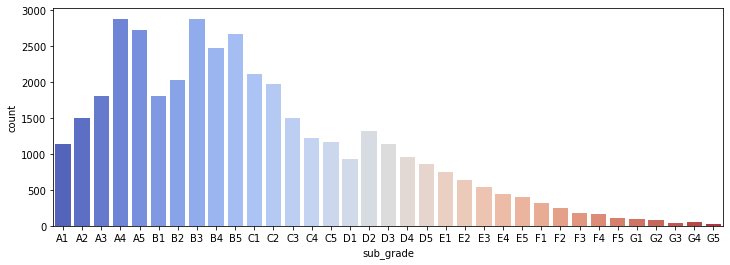

In [13]:
# subgrade countplot 1
plt.figure(figsize = (12, 4))
subgrade_order = sorted(loans['sub_grade'].unique())
sns.countplot(x = 'sub_grade', data = loans, order = subgrade_order, palette = 'coolwarm')

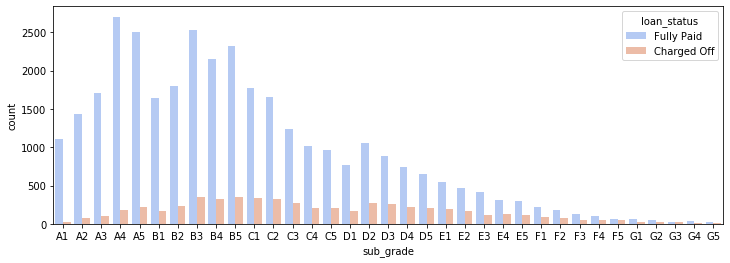

In [14]:
# subgrade countplot 2
plt.figure(figsize = (12, 4))
subgrade_order = sorted(loans['sub_grade'].unique())
sns.countplot(x = 'sub_grade', data = loans, order = subgrade_order, palette = 'coolwarm', hue = 'loan_status')

Grade F and G have lower probabilities to pay back the loans and will be magnified below. 

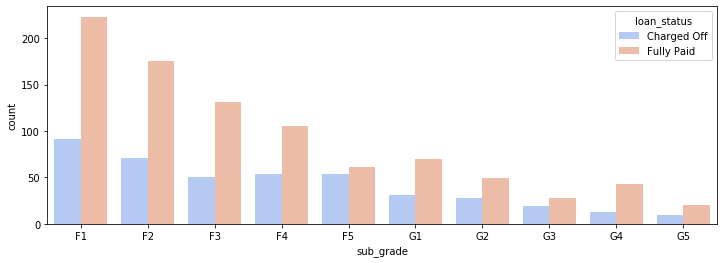

In [15]:
# subgrade countplot 2
plt.figure(figsize = (12, 4))
grade_f_g = loans[(loans['grade'] == 'F') | (loans['grade'] == 'G')]
subgrade_order = sorted(grade_f_g['sub_grade'].unique())
sns.countplot(x = 'sub_grade', data = grade_f_g, order = subgrade_order, palette = 'coolwarm', hue = 'loan_status')

In [16]:
# remove the columns that have only 1 unique value
orig_columns = loans.columns
drop_columns = []
for col in orig_columns:
    col_series = loans[col].dropna().unique()
    if len(col_series) == 1:
        drop_columns.append(col)
loans = loans.drop(drop_columns, axis=1)
print(drop_columns)

['initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [17]:
# null values
null_counts = loans.isnull().sum()
null_counts[null_counts > 0]

emp_length             1057
desc                  12766
title                    11
revol_util               50
last_credit_pull_d        2
dtype: int64

In [18]:
# FICO score range
print(loans['fico_range_low'].unique())
print(loans['fico_range_high'].unique())

[735. 740. 690. 730. 660. 675. 725. 695. 710. 705. 720. 665. 670. 760.
 685. 755. 680. 700. 790. 750. 715. 765. 745. 770. 780. 775. 795. 810.
 800. 815. 785. 805. 825. 820. 630. 625.]
[739. 744. 694. 734. 664. 679. 729. 699. 714. 709. 724. 669. 674. 764.
 689. 759. 684. 704. 794. 754. 719. 769. 749. 774. 784. 779. 799. 814.
 804. 819. 789. 809. 829. 824. 634. 629.]


39239
39239


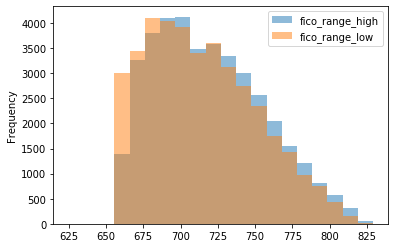

In [19]:
# visualization
fico_columns = ['fico_range_high', 'fico_range_low']
print(loans.shape[0])

loans.dropna(subset = fico_columns,inplace = True)
print(loans.shape[0])

loans[fico_columns].plot.hist(alpha = 0.5,bins = 20);

In [20]:
# FICO score average
loans['fico_average'] = (loans['fico_range_high'] + loans['fico_range_low']) / 2
cols = ['fico_range_low', 'fico_range_high', 'fico_average']
loans[cols].head()

,fico_range_low,fico_range_high,fico_average
0,735.0,739.0,737.0
1,740.0,744.0,742.0
2,735.0,739.0,737.0
3,690.0,694.0,692.0
5,730.0,734.0,732.0


In [21]:
# dropping FICO columns
drop_cols = ['fico_range_low', 'fico_range_high', 'last_fico_range_low', 'last_fico_range_high']
loans = loans.drop(drop_cols, axis = 1)
loans.shape

(39239, 28)

In [22]:
# removing null values 1
for null in null_counts[null_counts > 10000].index:
    loans = loans.drop(null, axis = 1)
    
null_counts = loans.isnull().sum()
null_counts[null_counts > 0]

emp_length            1057
title                   11
revol_util              50
last_credit_pull_d       2
dtype: int64

In [23]:
# removing null values 2
loans = loans.dropna()
null_counts = loans.isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

In [24]:
# selecting only object type columns
object_columns_df = loans.select_dtypes(include = "object")
object_columns_df.head()

,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,url,purpose,title,addr_state,earliest_cr_line,revol_util,last_credit_pull_d
0,36 months,10.65%,B,B2,10+ years,RENT,Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,credit_card,Computer,AZ,Jan-1985,83.7%,Sep-2016
1,60 months,15.27%,C,C4,< 1 year,RENT,Source Verified,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,car,bike,GA,Apr-1999,9.4%,Sep-2016
2,36 months,15.96%,C,C5,10+ years,RENT,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,small_business,real estate business,IL,Nov-2001,98.5%,Sep-2016
3,36 months,13.49%,C,C1,10+ years,RENT,Source Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1076863,other,personel,CA,Feb-1996,21%,Apr-2016
5,36 months,7.90%,A,A4,3 years,RENT,Source Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1075269,wedding,My wedding loan I promise to pay back,AZ,Nov-2004,28.3%,Jan-2016


In [25]:
# home ownership, verification status, emp length, term value counts
cols = ['home_ownership', 'verification_status', 'emp_length', 'term', 'addr_state']
for c in cols:
    print(loans[c].value_counts())

RENT        18271
MORTGAGE    16945
OWN          2808
OTHER          96
NONE            3
Name: home_ownership, dtype: int64
Not Verified       16391
Verified           12070
Source Verified     9662
Name: verification_status, dtype: int64
10+ years    8715
< 1 year     4542
2 years      4344
3 years      4050
4 years      3385
5 years      3243
1 year       3207
6 years      2198
7 years      1738
8 years      1457
9 years      1244
Name: emp_length, dtype: int64
 36 months    28234
 60 months     9889
Name: term, dtype: int64
CA    6833
NY    3657
FL    2741
TX    2639
NJ    1802
IL    1476
PA    1460
VA    1359
GA    1340
MA    1292
OH    1167
MD    1020
AZ     819
WA     796
CO     755
NC     747
CT     719
MI     684
MO     653
MN     586
NV     473
SC     461
WI     433
OR     427
AL     424
LA     422
KY     315
OK     289
KS     253
UT     250
AR     232
DC     211
RI     195
NM     182
HI     166
WV     165
NH     159
DE     110
WY      79
MT      78
AK      77
SD      60
VT  

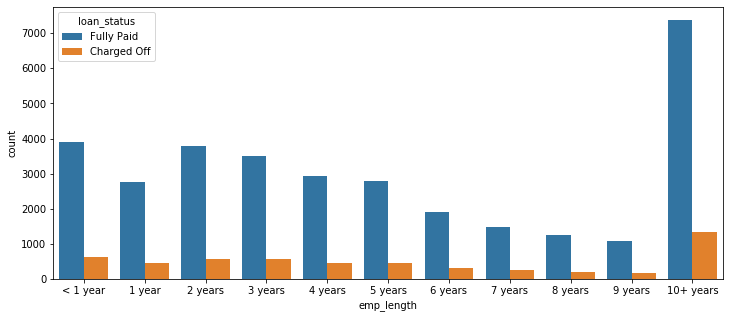

In [26]:
# employment length comparison
emp_length_order = [
    '< 1 year', 
    '1 year', 
    '2 years', 
    '3 years', 
    '4 years', 
    '5 years', 
    '6 years', 
    '7 years', 
    '8 years', 
    '9 years', 
    '10+ years'
]
plt.figure(figsize = (12, 5))
sns.countplot(
    x = 'emp_length', 
    data = loans, 
    order = emp_length_order, 
    hue = 'loan_status'
)

<Figure size 720x360 with 0 Axes>

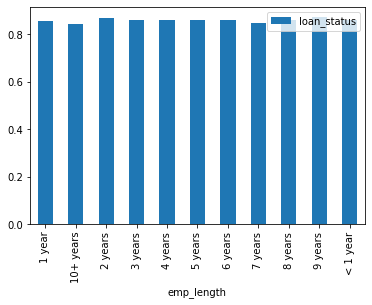

In [27]:
# fully paid percentage per employment length category
fullypaid_emp = loans[loans['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']
chargedoff_emp = loans[loans['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']

emp_percent = pd.DataFrame(fullypaid_emp/(fullypaid_emp + chargedoff_emp))
plt.figure(figsize = (10, 5))
emp_percent.plot(kind = 'bar')

In [28]:
# variables correlation
loans.corr()

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,fico_average
loan_amnt,1.000000,0.929995,0.267810,0.063395,-0.033611,0.011916,0.173206,-0.046916,0.314188,0.255272,0.120765
installment,0.929995,1.000000,0.266344,0.051580,-0.021428,0.011269,0.168752,-0.042699,0.309746,0.228807,0.055443
annual_inc,0.267810,0.266344,1.000000,-0.124179,0.021333,0.035694,0.155180,-0.015127,0.278352,0.234015,0.054036
dti,0.063395,0.051580,-0.124179,1.000000,-0.034948,-0.000420,0.289083,-0.004663,0.227756,0.230049,-0.199505
delinq_2yrs,-0.033611,-0.021428,0.021333,-0.034948,1.000000,0.007991,0.011118,0.010357,-0.055705,0.066733,-0.221007
inq_last_6mths,0.011916,0.011269,0.035694,-0.000420,0.007991,1.000000,0.093335,0.024748,-0.021978,0.113348,-0.036769
open_acc,0.173206,0.168752,0.155180,0.289083,0.011118,0.093335,1.000000,0.002430,0.287296,0.685432,-0.022257
pub_rec,-0.046916,-0.042699,-0.015127,-0.004663,0.010357,0.024748,0.002430,1.000000,-0.059279,-0.019537,-0.150787
revol_bal,0.314188,0.309746,0.278352,0.227756,-0.055705,-0.021978,0.287296,-0.059279,1.000000,0.313132,-0.034967
total_acc,0.255272,0.228807,0.234015,0.230049,0.066733,0.113348,0.685432,-0.019537,0.313132,1.000000,0.116013


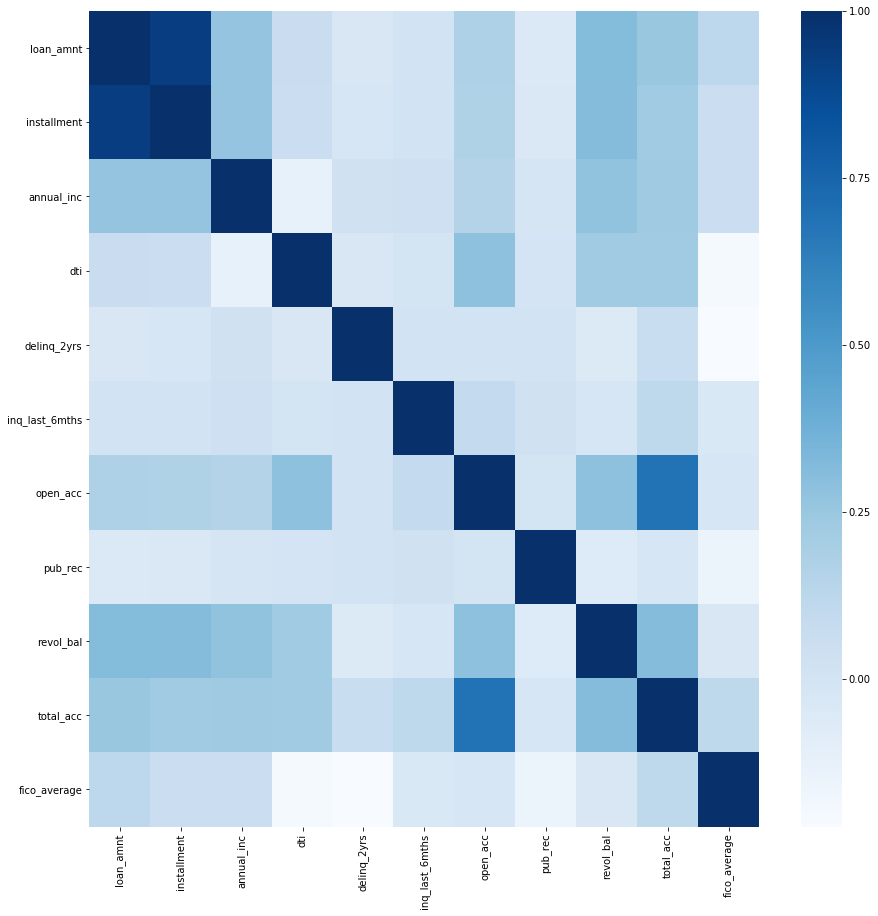

In [29]:
# heatmap
plt.figure(figsize = (15, 15))
sns.heatmap(loans.corr(), cmap = 'Blues')

Installment and loan amount have high correlation (0.929995) because the more someone borrows, the bigger their installment will be.

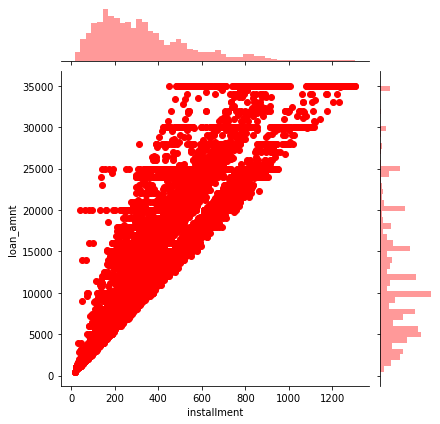

In [30]:
# jointplot
sns.jointplot(x = 'installment', y = 'loan_amnt', data = loans, color = 'red')

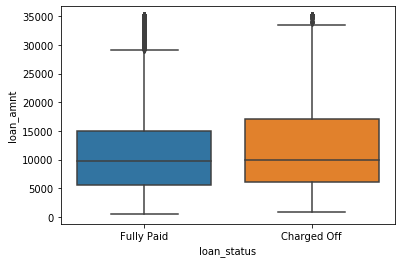

In [31]:
# boxplot
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loans)

In [32]:
# boxplot references
loans.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5406.0,12291.167222,8099.916081,900.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,32717.0,11038.095638,7267.299840,500.0,5500.0,9800.0,15000.0,35000.0


In [33]:
# states data frame
addr_df = pd.DataFrame([loans.groupby('addr_state').count()['loan_amnt']]).transpose()
addr_df.head()

,loan_amnt
addr_state,
AK,77
AL,424
AR,232
AZ,819
CA,6833


In [34]:
# geographical plotting
geo_loans = dict(
    type = 'choropleth',
    colorscale = 'electric',
    reversescale = True,
    locations = addr_df.index,
    z = addr_df['loan_amnt'],
    locationmode = 'USA-states',
    text = addr_df.index,
    colorbar = {
        'title': 'Loans Counts'
    }
)

layout_loans = dict(
    title = 'Lending Club Loans States',
    geo = dict(
        scope = 'usa',
        showlakes = True,
        lakecolor = 'rgb(85, 173, 240)'
    )
)
choromap = go.Figure(data = [geo_loans], layout = layout_loans)
iplot(choromap, validate = False)

In [35]:
# title and purpose value counts
print(loans["title"].value_counts())
print(loans["purpose"].value_counts())

Debt Consolidation                         2102
Debt Consolidation Loan                    1635
Personal Loan                               632
Consolidation                               495
debt consolidation                          476
Credit Card Consolidation                   346
Home Improvement                            340
Debt consolidation                          321
Small Business Loan                         305
Credit Card Loan                            299
Personal                                    294
Consolidation Loan                          254
Home Improvement Loan                       235
personal loan                               223
Loan                                        204
personal                                    204
Wedding Loan                                204
Car Loan                                    191
consolidation                               190
Other Loan                                  174
Wedding                                 

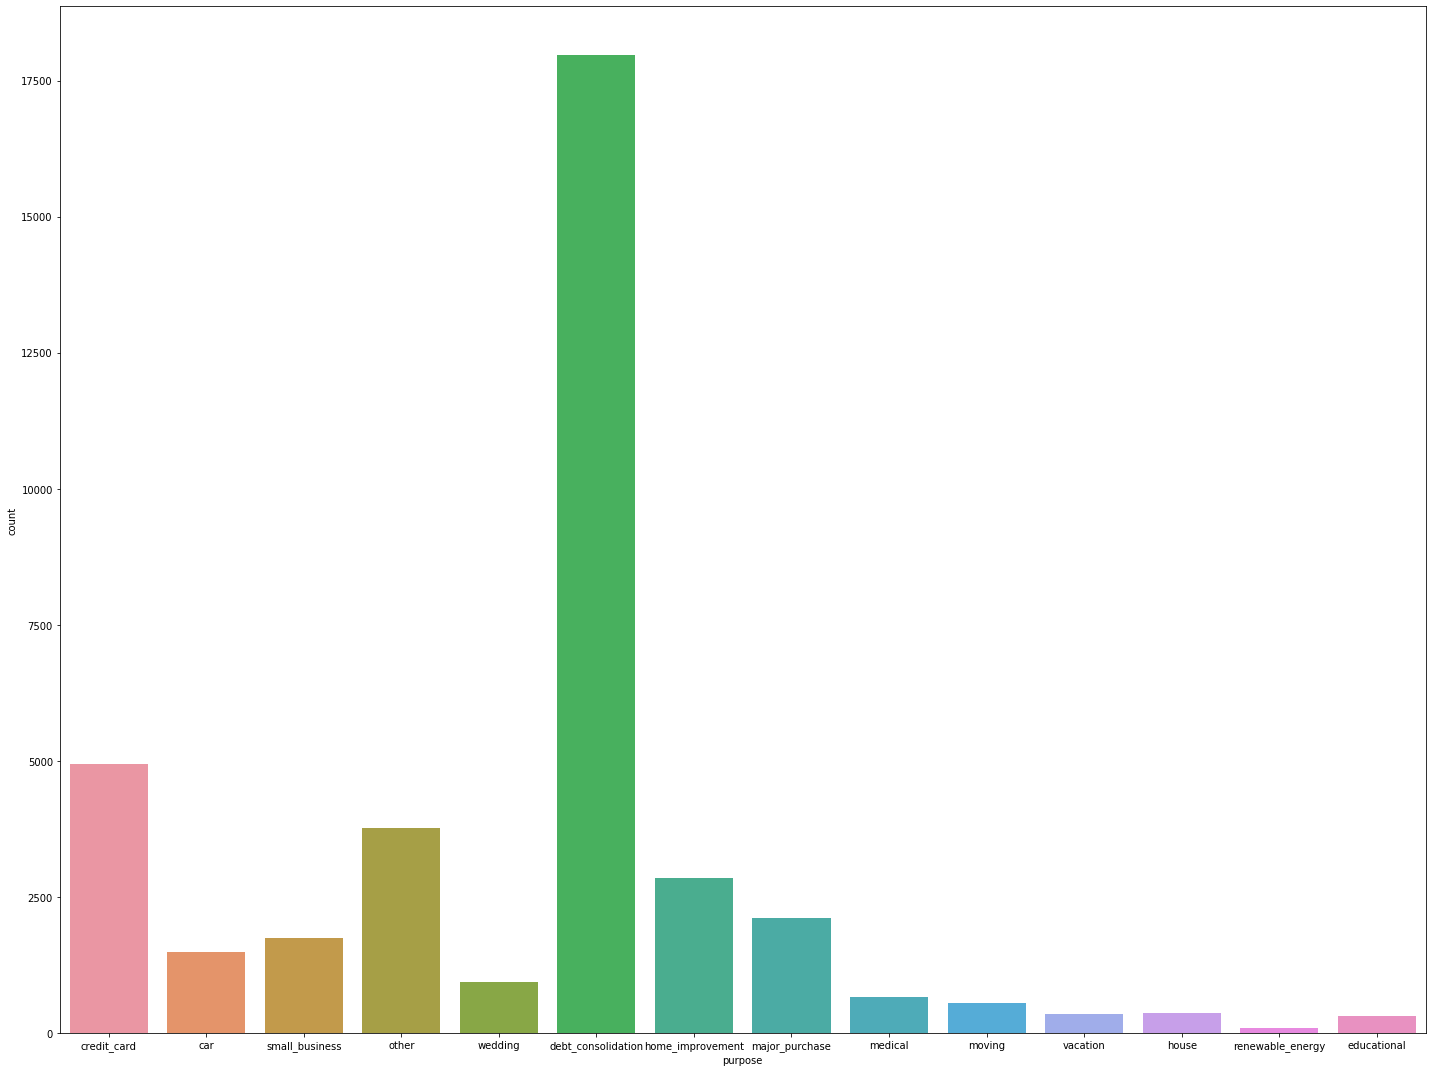

In [36]:
# purpose countplot
plt.figure(figsize = (20, 15))
sns.countplot('purpose', data = loans)
plt.tight_layout()

In [37]:
# mapping emp length
emp_length_dict = {
    'emp_length': {
        '10+ years': 10,
        '9 years': 9,
        '8 years': 8,
        '7 years': 7,
        '6 years': 6,
        '5 years': 5,
        '4 years': 4,
        '3 years': 3,
        '2 years': 2,
        '1 year': 1,
        '< 1 year': 0,
        'n/a': 0
    }
}
loans = loans.drop(['grade', 'pymnt_plan', 'addr_state', 'url', 'last_credit_pull_d', 'title'], axis=1)
loans['int_rate'] = loans['int_rate'].str.rstrip('%').astype('float')
loans['revol_util'] = loans['revol_util'].str.rstrip('%').astype('float')
loans = loans.replace(emp_length_dict)
loans.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,fico_average
0,5000.0,36 months,10.65,162.87,B2,10,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,737.0
1,2500.0,60 months,15.27,59.83,C4,0,RENT,30000.0,Source Verified,Charged Off,car,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,742.0
2,2400.0,36 months,15.96,84.33,C5,10,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,737.0
3,10000.0,36 months,13.49,339.31,C1,10,RENT,49200.0,Source Verified,Fully Paid,other,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21.0,37.0,692.0
5,5000.0,36 months,7.90,156.46,A4,3,RENT,36000.0,Source Verified,Fully Paid,wedding,11.20,0.0,Nov-2004,3.0,9.0,0.0,7963.0,28.3,12.0,732.0


In [38]:
# replacing any and none in home ownership to other
loans['home_ownership'] = loans['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
loans['home_ownership'].value_counts()

RENT        18271
MORTGAGE    16945
OWN          2808
OTHER          99
Name: home_ownership, dtype: int64

In [39]:
# changing earliest credit line column
loans['earliest_cr_line'] = loans['earliest_cr_line'].apply(lambda date: int(date[-4:]))
loans['earliest_cr_line'].value_counts()

2000    3151
1999    2881
1998    2767
2001    2452
1997    2364
1996    2194
1995    2077
1994    1949
2002    1876
2003    1805
2004    1721
1993    1451
2005    1441
2006    1121
1992    1025
1990     989
1991     939
1989     817
1988     700
2007     685
1987     594
1986     466
1985     435
1984     379
1983     318
1982     203
1981     168
1980     166
1979     147
2008     147
1978     140
1977     101
1976      79
1975      68
1974      54
1973      48
1972      40
1971      40
1970      37
1969      27
1967      15
1968      14
1966       8
1965       7
1963       6
1964       4
1962       3
1956       1
1954       1
1950       1
1946       1
Name: earliest_cr_line, dtype: int64

In [40]:
# getting dummy variables
dummy_df = pd.get_dummies(loans[['sub_grade', 'home_ownership', 'verification_status', 'purpose', 'term']], drop_first = True)
loans = pd.concat([loans, dummy_df], axis = 1)
loans = loans.drop(['sub_grade', 'home_ownership', 'verification_status', 'purpose', 'term'], axis = 1)
loans.head()

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,fico_average,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 60 months
0,5000.0,10.65,162.87,10,24000.0,Fully Paid,27.65,0.0,1985,1.0,3.0,0.0,13648.0,83.7,9.0,737.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,15.27,59.83,0,30000.0,Charged Off,1.00,0.0,1999,5.0,3.0,0.0,1687.0,9.4,4.0,742.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2400.0,15.96,84.33,10,12252.0,Fully Paid,8.72,0.0,2001,2.0,2.0,0.0,2956.0,98.5,10.0,737.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,10000.0,13.49,339.31,10,49200.0,Fully Paid,20.00,0.0,1996,1.0,10.0,0.0,5598.0,21.0,37.0,692.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,5000.0,7.90,156.46,3,36000.0,Fully Paid,11.20,0.0,2004,3.0,9.0,0.0,7963.0,28.3,12.0,732.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [41]:
# replacing status for machine learning
status_r = {
    'loan_status': {
        'Fully Paid': 1,
        'Charged Off': 0
    }
}

loans = loans.replace(status_r)
loans.head()

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,fico_average,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 60 months
0,5000.0,10.65,162.87,10,24000.0,1,27.65,0.0,1985,1.0,3.0,0.0,13648.0,83.7,9.0,737.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,15.27,59.83,0,30000.0,0,1.00,0.0,1999,5.0,3.0,0.0,1687.0,9.4,4.0,742.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2400.0,15.96,84.33,10,12252.0,1,8.72,0.0,2001,2.0,2.0,0.0,2956.0,98.5,10.0,737.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,10000.0,13.49,339.31,10,49200.0,1,20.00,0.0,1996,1.0,10.0,0.0,5598.0,21.0,37.0,692.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,5000.0,7.90,156.46,3,36000.0,1,11.20,0.0,2004,3.0,9.0,0.0,7963.0,28.3,12.0,732.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [42]:
# setting up x and y
x = loans.drop(['loan_status'], axis = 1).values
y = loans["loan_status"].values

# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

In [43]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

D:\Applications\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
# prediction
prediction = logreg.predict(x_test)

In [45]:
# classification report
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.10      0.00      0.00      1090
           1       0.86      1.00      0.92      6535

    accuracy                           0.86      7625
   macro avg       0.48      0.50      0.46      7625
weighted avg       0.75      0.86      0.79      7625



In [46]:
# confusion matrix
conmat = np.array(metrics.confusion_matrix(y_test, prediction))

conlist = []
for i in np.squeeze(conmat):
    conlist.append(i)

matrix = pd.DataFrame(conlist, columns = [['Predicted', 'Predicted'], ['0', '1']]).transpose()
matrix.columns = [['Actual', 'Actual'], ['0', '1']]
matrix.transpose()

Predicted      
                 0     1
Actual 0         1  1089
       1         9  6526

In [47]:
# Random Forest Classifier
rand_for = RandomForestClassifier(class_weight = "balanced", random_state = 101)
rand_for.fit(x_train, y_train)

D:\Applications\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=101, verbose=0, warm_start=False)

In [48]:
# prediction
prediction = rand_for.predict(x_test)

In [49]:
# classification report
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.32      0.06      0.11      1090
           1       0.86      0.98      0.92      6535

    accuracy                           0.85      7625
   macro avg       0.59      0.52      0.51      7625
weighted avg       0.78      0.85      0.80      7625



In [50]:
# confusion matrix
conmat = np.array(metrics.confusion_matrix(y_test, prediction))

conlist = []
for i in np.squeeze(conmat):
    conlist.append(i)

matrix = pd.DataFrame(conlist, columns = [['Predicted', 'Predicted'], ['0', '1']]).transpose()
matrix.columns = [['Actual', 'Actual'], ['0', '1']]
matrix.transpose()

Predicted      
                 0     1
Actual 0        70  1020
       1       151  6384

In [51]:
# scaling the data with MinMaxScaler
minmaxscaler = MinMaxScaler()

x_train = minmaxscaler.fit_transform(x_train)
x_test = minmaxscaler.transform(x_test)

x_train.shape

(30498, 68)

In [52]:
# deep learning model
model = Sequential()

# hidden layers
model.add(Dense(units = 78, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 39, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 19, activation = 'relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [53]:
# fitting the model
model.fit(
    x = x_train, 
    y = y_train,
    epochs = 25,
    batch_size = 256,
    validation_data = (x_test, y_test)
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 30498 samples, validate on 7625 samples
Epoch 1/25
30498/30498 [==============================] - 1s 47us/sample - loss: 0.4423 - val_loss: 0.3914
Epoch 2/25
30498/30498 [==============================] - 1s 22us/sample - loss: 0.3976 - val_loss: 0.3873
Epoch 3/25
30498/30498 [==============================] - 1s 22us/sample - loss: 0.3910 - val_loss: 0.3861
Epoch 4/25
30498/30498 [==============================] - 1s 22us/sample - loss: 0.3893 - val_loss: 0.3858
Epoch 5/25
30498/30498 [==============================] - 1s 23us/sample - loss: 0.3871 - val_loss: 0.3855
Epoch 6/25
30498/30498 [==============================] - 1s 22us/sample - loss: 0.3860 - val_loss: 0.3853
Epoch 7/25
30498/30498 [==============================] - 1s 24us/sample - loss: 0.3839 - val_loss: 0.3855
Epoch 8/25
30498/30498 [==============================] - 1s 22us/sample - loss: 0.3821 - val_loss: 0.3849
E

<Figure size 720x576 with 0 Axes>

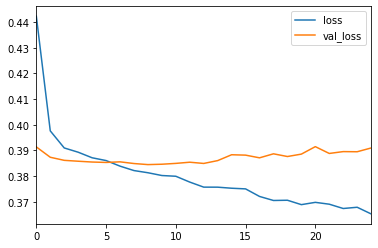

In [54]:
# model history
loss_df = pd.DataFrame(model.history.history)

# loss plot
plt.figure(figsize = (10, 8))
loss_df.plot()

In [55]:
# prediction
prediction = model.predict_classes(x_test)

In [56]:
# classification report
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.33      0.01      0.02      1090
           1       0.86      1.00      0.92      6535

    accuracy                           0.86      7625
   macro avg       0.60      0.50      0.47      7625
weighted avg       0.78      0.86      0.79      7625



In [57]:
# confusion matrix
conmat = np.array(metrics.confusion_matrix(y_test, prediction))

conlist = []
for i in np.squeeze(conmat):
    conlist.append(i)

matrix = pd.DataFrame(conlist, columns = [['Predicted', 'Predicted'], ['0', '1']]).transpose()
matrix.columns = [['Actual', 'Actual'], ['0', '1']]
matrix.transpose()

Predicted      
                 0     1
Actual 0        13  1077
       1        26  6509

In [58]:
# using EarlyStopping
earlystop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

# fitting the model
model.fit(
    x = x_train, 
    y = y_train,
    epochs = 25,
    batch_size = 256,
    validation_data = (x_test, y_test),
    callbacks = [earlystop]
)

Train on 30498 samples, validate on 7625 samples
Epoch 1/25
30498/30498 [==============================] - 1s 23us/sample - loss: 0.3658 - val_loss: 0.3919
Epoch 2/25
30498/30498 [==============================] - 1s 23us/sample - loss: 0.3636 - val_loss: 0.3910
Epoch 3/25
30498/30498 [==============================] - 1s 26us/sample - loss: 0.3627 - val_loss: 0.3931
Epoch 4/25
30498/30498 [==============================] - 1s 24us/sample - loss: 0.3629 - val_loss: 0.3933
Epoch 5/25
30498/30498 [==============================] - 1s 22us/sample - loss: 0.3616 - val_loss: 0.3935
Epoch 6/25
30498/30498 [==============================] - 1s 22us/sample - loss: 0.3614 - val_loss: 0.3955
Epoch 7/25
30498/30498 [==============================] - 1s 22us/sample - loss: 0.3597 - val_loss: 0.3960
Epoch 8/25
30498/30498 [==============================] - 1s 23us/sample - loss: 0.3590 - val_loss: 0.3948
Epoch 9/25
30498/30498 [==============================] - 1s 22us/sample - loss: 0.3578 - val_l

<Figure size 720x576 with 0 Axes>

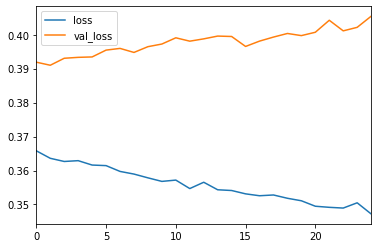

In [59]:
# model history
loss_df = pd.DataFrame(model.history.history)

# loss plot
plt.figure(figsize = (10, 8))
loss_df.plot()

In [60]:
# prediction
prediction = model.predict_classes(x_test)

In [61]:
# classification report
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.33      0.07      0.12      1090
           1       0.86      0.98      0.92      6535

    accuracy                           0.85      7625
   macro avg       0.60      0.52      0.52      7625
weighted avg       0.79      0.85      0.80      7625



In [62]:
# confusion matrix
conmat = np.array(metrics.confusion_matrix(y_test, prediction))

conlist = []
for i in np.squeeze(conmat):
    conlist.append(i)

matrix = pd.DataFrame(conlist, columns = [['Predicted', 'Predicted'], ['0', '1']]).transpose()
matrix.columns = [['Actual', 'Actual'], ['0', '1']]
matrix.transpose()

Predicted      
                 0     1
Actual 0        77  1013
       1       156  6379

Imbalances of the target label (loan status) create severe inaccuracies.

In [63]:
# simulation 
random.seed(101)
random_ind = random.randint(0, len(loans))

new_borrower = loans.drop('loan_status', axis = 1).iloc[random_ind]
new_borrower

loan_amnt                               3000
int_rate                               11.86
installment                            99.44
emp_length                                 2
annual_inc                             36153
dti                                     7.47
delinq_2yrs                                0
earliest_cr_line                        2000
inq_last_6mths                             2
open_acc                                   3
pub_rec                                    1
revol_bal                               1064
revol_util                              70.9
total_acc                                  6
fico_average                             667
sub_grade_A2                               0
sub_grade_A3                               0
sub_grade_A4                               0
sub_grade_A5                               0
sub_grade_B1                               0
sub_grade_B2                               0
sub_grade_B3                               0
sub_grade_

In [64]:
# reshaping 
new_borrower = minmaxscaler.transform(new_borrower.values.reshape(1, 68))

# predicting the simulation
print('Prediction: {}'.format(model.predict_classes(new_borrower)[0][0]))

Prediction: 1


In [65]:
# checking with the actual data
print('Actual: {}'.format(loans.iloc[random_ind]['loan_status']))

Actual: 1
